In [1538]:
#Problem Statement: To build Classification models (kNN, Logistic Regression, SVM and Decision trees) and Regression Model, 
#predict the values for the test and train data and find the Accuracy, Precision and Recall Scores for
#the given bikebuyers dataset.

In [1539]:
#Importing all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
os.chdir("C:/Users/Ahmed Khan/Desktop/Data Sets")

In [1540]:
os.getcwd()

'C:\\Users\\Ahmed Khan\\Desktop\\Data Sets'

In [1541]:
df = pd.read_csv("bikebuyer1 (1).csv")
df

,ID,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
0,22711.0,Single,Male,30000,0.0,Partial College,Clerical,No,1,1.0,Europe,33,Yes
1,13555.0,Married,Female,40000,0.0,Graduate Degree,Clerical,Yes,0,1.0,Europe,37,Yes
2,NaN,Married,Male,160000,5.0,Partial College,Professional,No,3,2.0,Europe,55,No
3,2.0,Single,Male,160000,0.0,Graduate Degree,Management,Yes,2,5.0,Pacific,47,No
4,25410.0,NaN,Female,70000,2.0,Bachelors,Skilled Manual,No,1,1.0,North America,38,Yes
5,4.0,Married,NaN,120000,2.0,Bachelors,Management,Yes,3,1.0,North America,40,No
6,15756.0,Single,Female,70000,0.0,High School,Professional,Yes,2,NaN,Pacific,49,Yes
7,11085.0,Single,Female,60000,0.0,High School,Professional,No,2,1.0,North America,49,No
8,17974.0,NaN,Female,0,NaN,Bachelors,Clerical,Yes,0,10.0,Europe,38,Yes
9,21008.0,Single,Female,20000,1.0,Partial College,Manual,No,0,1.0,Europe,46,Yes


In [1542]:
#Dropping the column 'ID' since it does not affect the target
df = df.drop(['ID'], axis=1)
df

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
0,Single,Male,30000,0.0,Partial College,Clerical,No,1,1.0,Europe,33,Yes
1,Married,Female,40000,0.0,Graduate Degree,Clerical,Yes,0,1.0,Europe,37,Yes
2,Married,Male,160000,5.0,Partial College,Professional,No,3,2.0,Europe,55,No
3,Single,Male,160000,0.0,Graduate Degree,Management,Yes,2,5.0,Pacific,47,No
4,NaN,Female,70000,2.0,Bachelors,Skilled Manual,No,1,1.0,North America,38,Yes
5,Married,NaN,120000,2.0,Bachelors,Management,Yes,3,1.0,North America,40,No
6,Single,Female,70000,0.0,High School,Professional,Yes,2,NaN,Pacific,49,Yes
7,Single,Female,60000,0.0,High School,Professional,No,2,1.0,North America,49,No
8,NaN,Female,0,NaN,Bachelors,Clerical,Yes,0,10.0,Europe,38,Yes
9,Single,Female,20000,1.0,Partial College,Manual,No,0,1.0,Europe,46,Yes


# Exploratory Data Analysis and Interpretation

In [1543]:
#Printing the starting 5 rows
df.head()

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
0,Single,Male,30000,0.0,Partial College,Clerical,No,1,1.0,Europe,33,Yes
1,Married,Female,40000,0.0,Graduate Degree,Clerical,Yes,0,1.0,Europe,37,Yes
2,Married,Male,160000,5.0,Partial College,Professional,No,3,2.0,Europe,55,No
3,Single,Male,160000,0.0,Graduate Degree,Management,Yes,2,5.0,Pacific,47,No
4,NaN,Female,70000,2.0,Bachelors,Skilled Manual,No,1,1.0,North America,38,Yes


In [1544]:
#Printing the last 5 values
df.tail()

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
6992,Married,Male,100000,4.0,High School,Professional,Yes,3,1.0,Europe,52,No
6993,Married,Female,130000,4.0,Partial College,Professional,Yes,4,2.0,Europe,52,No
6994,Married,Female,160000,5.0,Bachelors,Management,Yes,2,1.0,Europe,53,No
6995,Single,Female,120000,5.0,Partial College,Professional,Yes,3,1.0,Europe,54,No
6996,Married,Male,130000,5.0,High School,Professional,Yes,3,2.0,Europe,54,No


In [1545]:
df.describe()

,Yearly Income,Children,Cars,Commute Distance,Age
count,6997.000000,6979.000000,6997.000000,6968.000000,6997.000000
mean,57020.151493,1.111621,1.586823,4.210103,45.107332
std,32080.449720,1.600912,1.146782,2.926211,11.916654
min,0.000000,0.000000,0.000000,1.000000,25.000000
25%,30000.000000,0.000000,1.000000,1.000000,36.000000
50%,60000.000000,0.000000,2.000000,4.000000,44.000000
75%,70000.000000,2.000000,2.000000,6.000000,53.000000
max,170000.000000,5.000000,4.000000,13.000000,96.000000


In [1546]:
df.cov()

,Yearly Income,Children,Cars,Commute Distance,Age
Yearly Income,1.029155e+09,24380.349828,17367.818463,888.942245,74680.941428
Children,2.438035e+04,2.562919,0.823193,0.123484,-0.009929
Cars,1.736782e+04,0.823193,1.315109,0.061749,1.928144
Commute Distance,8.889422e+02,0.123484,0.061749,8.562711,-0.910780
Age,7.468094e+04,-0.009929,1.928144,-0.910780,142.006631


In [1547]:
df.corr()

,Yearly Income,Children,Cars,Commute Distance,Age
Yearly Income,1.000000,0.474575,0.472089,0.009467,0.195351
Children,0.474575,1.000000,0.448379,0.026377,-0.000520
Cars,0.472089,0.448379,1.000000,0.018397,0.141093
Commute Distance,0.009467,0.026377,0.018397,1.000000,-0.026119
Age,0.195351,-0.000520,0.141093,-0.026119,1.000000


In [1548]:
df['Yearly Income'].min()

0

In [1549]:
df['Yearly Income'].max()

170000

In [1550]:
df['Yearly Income'].median()

60000.0

In [1551]:
df['Yearly Income'].mean()

57020.151493497215

In [1552]:
df['Children'].min()

0.0

In [1553]:
df['Children'].max()

5.0

In [1554]:
df['Children'].median()

0.0

In [1555]:
df['Children'].mean()

1.1116205760137556

In [1556]:
df['Cars'].min()

0

In [1557]:
df['Cars'].max()

4

In [1558]:
df['Cars'].median()

2.0

In [1559]:
df['Cars'].mean()

1.586822924110333

In [1560]:
df['Commute Distance'].min()

1.0

In [1561]:
df['Commute Distance'].max()

13.0

In [1562]:
df['Commute Distance'].median()

4.0

In [1563]:
df['Commute Distance'].mean()

4.210103329506315

In [1564]:
df['Age'].min()

25

In [1565]:
df['Age'].max()

96

In [1566]:
df['Age'].median()

44.0

In [1567]:
df['Age'].mean()

45.10733171359154

In [1568]:
df['Marital Status'].value_counts()

Married    4133
Single     2848
Name: Marital Status, dtype: int64

In [1569]:
#Married people are more in number than single people

In [1570]:
df['Gender'].value_counts()

Male      3527
Female    3441
Name: Gender, dtype: int64

In [1571]:
#Males are more in number than Females

In [1572]:
df['Yearly Income'].value_counts()

60000     1291
40000      906
70000      852
30000      834
20000      690
80000      548
10000      509
90000      296
100000     239
50000      226
110000     197
130000     186
120000     127
150000      37
160000      29
170000      28
0            2
Name: Yearly Income, dtype: int64

In [1573]:
df['Children'].value_counts()

0.0    4042
1.0     919
2.0     556
3.0     531
4.0     521
5.0     410
Name: Children, dtype: int64

In [1574]:
df['Education'].value_counts()

Partial College        1932
Bachelors              1870
High School            1313
Graduate Degree        1272
Partial High School     610
Name: Education, dtype: int64

In [1575]:
#People in 'Partial College' are more in number

In [1576]:
df['Occupation'].value_counts()

Professional      2031
Skilled Manual    1748
Management        1265
Manual             990
Clerical           963
Name: Occupation, dtype: int64

In [1577]:
#People having 'Professional' occupation are more in number

In [1578]:
df['Home Owner'].value_counts()

Yes    4979
No     2018
Name: Home Owner, dtype: int64

In [1579]:
#More number of people are Home Owners

In [1580]:
df['Cars'].value_counts()

2    2581
1    1788
0    1431
3     635
4     562
Name: Cars, dtype: int64

In [1581]:
df['Commute Distance'].value_counts()

1.0     1750
2.0     1150
5.0      931
7.0      768
6.0      632
3.0      543
8.0      403
9.0      282
4.0      230
11.0     132
13.0      74
10.0      69
12.0       4
Name: Commute Distance, dtype: int64

In [1582]:
df['Region'].value_counts()

North America    3728
Europe           2096
Pacific          1173
Name: Region, dtype: int64

In [1583]:
#More number of people are from North America

In [1584]:
df['Age'].value_counts()

42    283
41    251
35    232
39    229
48    225
44    219
43    217
45    216
40    215
30    207
46    206
33    195
38    192
37    189
47    189
31    188
34    186
32    173
36    170
49    162
29    160
28    154
50    150
53    145
52    143
55    141
51    135
56    132
58    132
27    131
     ... 
64     87
65     61
68     56
69     55
66     52
67     41
70     36
71     35
72     31
73     24
25     13
74     10
75      8
77      8
76      6
78      5
80      5
84      4
94      3
86      3
82      3
79      2
83      2
93      2
89      2
85      1
96      1
90      1
87      1
95      1
Name: Age, Length: 68, dtype: int64

In [1585]:
df['Bike Buyer'].value_counts()

No     5997
Yes    1000
Name: Bike Buyer, dtype: int64

In [1586]:
#More number of people are not bikebuyers

In [1587]:
df[df['Gender'].str.contains('Male') & df['Region'].str.contains('Pacific')]

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
3,Single,Male,160000,0.0,Graduate Degree,Management,Yes,2,5.0,Pacific,47,No
15,Single,Male,70000,0.0,Partial College,Skilled Manual,No,1,1.0,Pacific,44,No
22,Married,Male,70000,4.0,Bachelors,Professional,Yes,2,1.0,Pacific,44,No
26,Married,Male,70000,4.0,Partial College,Skilled Manual,Yes,2,1.0,Pacific,44,No
27,Married,Male,70000,4.0,Partial College,Skilled Manual,Yes,2,9.0,Pacific,44,No
28,Single,Male,80000,NaN,Partial College,Skilled Manual,No,1,5.0,Pacific,49,No
31,Married,Male,70000,0.0,Bachelors,Professional,No,1,1.0,Pacific,42,Yes
35,Married,Male,70000,4.0,Partial College,Skilled Manual,Yes,3,1.0,Pacific,45,No
36,Married,Male,70000,4.0,Partial College,Skilled Manual,Yes,3,1.0,Pacific,46,No
37,Married,Male,70000,4.0,Partial College,Skilled Manual,Yes,3,2.0,Pacific,46,No


In [1588]:
#We see that there are 592 Males from Pacific

In [1589]:
df[df['Gender'].str.contains('Male') & df['Region'].str.contains('Europe')]

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
0,Single,Male,30000,0.0,Partial College,Clerical,No,1,1.0,Europe,33,Yes
2,Married,Male,160000,5.0,Partial College,Professional,No,3,2.0,Europe,55,No
29,Single,Male,40000,0.0,Graduate Degree,Clerical,Yes,0,1.0,Europe,37,Yes
33,Single,Male,30000,0.0,Bachelors,Clerical,Yes,0,2.0,Europe,63,Yes
76,Single,Male,100000,3.0,Partial College,Professional,Yes,4,6.0,Europe,49,Yes
79,Single,Male,30000,0.0,Bachelors,Clerical,No,0,NaN,Europe,37,Yes
82,Married,Male,40000,1.0,Bachelors,Skilled Manual,Yes,1,5.0,Europe,34,Yes
88,Single,Male,30000,0.0,High School,Manual,No,1,3.0,Europe,35,Yes
108,Married,Male,20000,0.0,Partial College,Manual,Yes,1,1.0,Europe,47,Yes
113,Single,Male,40000,0.0,Graduate Degree,Clerical,Yes,0,2.0,Europe,38,Yes


In [1590]:
#We see that there are 1030 Males from Europe

In [1591]:
df[df['Gender'].str.contains('Male') & df['Region'].str.contains('North America')]

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
10,Single,Male,50000,0.0,Bachelors,Management,No,2,2.0,North America,64,No
14,Married,Male,90000,0.0,Partial College,Professional,Yes,1,1.0,North America,49,No
18,Single,Male,0,0.0,Partial College,Clerical,Yes,1,2.0,North America,48,Yes
45,Married,Male,80000,0.0,Graduate Degree,Professional,Yes,0,1.0,North America,47,Yes
50,Single,Male,60000,0.0,Graduate Degree,Professional,Yes,0,1.0,North America,39,Yes
58,Married,Male,40000,0.0,Partial College,Clerical,Yes,1,1.0,North America,52,Yes
59,Single,Male,30000,0.0,Partial High School,Clerical,No,2,5.0,North America,29,No
63,Single,Male,40000,0.0,High School,Skilled Manual,No,2,1.0,North America,29,No
65,Married,Male,40000,0.0,High School,Skilled Manual,Yes,2,3.0,North America,29,No
66,Single,Male,40000,0.0,High School,Skilled Manual,No,2,6.0,North America,27,Yes


In [1592]:
#We see that there are 1905 males from North America

In [1593]:
df[df['Gender'].str.contains('Female') & df['Region'].str.contains('Pacific')]

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
6,Single,Female,70000,0.0,High School,Professional,Yes,2,NaN,Pacific,49,Yes
19,NaN,Female,60000,0.0,Partial College,Skilled Manual,No,1,6.0,Pacific,45,No
20,Single,Female,60000,2.0,Bachelors,Professional,Yes,2,1.0,Pacific,43,Yes
24,Single,Female,70000,4.0,Partial College,Skilled Manual,Yes,2,1.0,Pacific,44,No
30,Single,Female,70000,0.0,Bachelors,Professional,Yes,1,1.0,Pacific,42,Yes
38,Single,Female,70000,0.0,Partial College,Skilled Manual,Yes,1,2.0,Pacific,50,No
40,Single,Female,70000,0.0,Bachelors,Professional,No,1,1.0,Pacific,38,Yes
47,Married,Female,20000,0.0,Bachelors,Clerical,No,0,5.0,Pacific,27,Yes
55,Married,Female,40000,0.0,Bachelors,Management,Yes,2,2.0,Pacific,65,Yes
56,Single,Female,30000,0.0,Partial College,Clerical,No,2,3.0,Pacific,68,No


In [1594]:
#We see that there are 572 Females from Pacific

In [1595]:
df[df['Gender'].str.contains('Female') & df['Region'].str.contains('Europe')]

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
1,Married,Female,40000,0.0,Graduate Degree,Clerical,Yes,0,1.0,Europe,37,Yes
8,NaN,Female,0,NaN,Bachelors,Clerical,Yes,0,10.0,Europe,38,Yes
9,Single,Female,20000,1.0,Partial College,Manual,No,0,1.0,Europe,46,Yes
25,Single,Female,90000,0.0,Partial College,Professional,No,2,1.0,Europe,62,Yes
51,Single,Female,170000,3.0,High School,Professional,No,4,13.0,Europe,50,No
77,Single,Female,20000,NaN,High School,Manual,Yes,1,7.0,Europe,43,Yes
86,Single,Female,40000,NaN,Bachelors,Clerical,No,0,1.0,Europe,39,Yes
106,Married,Female,40000,0.0,Bachelors,Skilled Manual,Yes,0,5.0,Europe,43,Yes
109,Married,Female,150000,3.0,Partial College,Professional,Yes,3,1.0,Europe,49,Yes
111,Married,Female,20000,0.0,Partial College,Manual,No,1,10.0,Europe,47,Yes


In [1596]:
#We see that there are 1061 Females from Europe

In [1597]:
df[df['Gender'].str.contains('Female') & df['Region'].str.contains('North America')]

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
4,NaN,Female,70000,2.0,Bachelors,Skilled Manual,No,1,1.0,North America,38,Yes
7,Single,Female,60000,0.0,High School,Professional,No,2,1.0,North America,49,No
11,Married,Female,70000,2.0,Partial College,Professional,No,0,11.0,North America,49,No
13,NaN,Female,40000,0.0,Partial College,Clerical,Yes,1,1.0,North America,50,Yes
16,Single,Female,50000,2.0,Bachelors,Skilled Manual,Yes,1,2.0,North America,39,Yes
17,Married,Female,40000,0.0,Partial College,Clerical,Yes,1,1.0,North America,51,Yes
23,NaN,Female,70000,0.0,Graduate Degree,Professional,Yes,0,NaN,North America,37,Yes
32,Single,Female,40000,0.0,Partial College,Skilled Manual,No,1,6.0,North America,30,Yes
39,Married,Female,40000,0.0,High School,Skilled Manual,Yes,1,1.0,North America,31,No
41,Married,Female,70000,1.0,Partial College,Professional,Yes,2,8.0,North America,58,Yes


In [1598]:
#We see that there are 1808 Females from North America

In [1599]:
df[df['Marital Status'].str.contains('Married') & df['Occupation'].str.contains('Clerical')]

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
1,Married,Female,40000,0.0,Graduate Degree,Clerical,Yes,0,1.0,Europe,37,Yes
17,Married,Female,40000,0.0,Partial College,Clerical,Yes,1,1.0,North America,51,Yes
47,Married,Female,20000,0.0,Bachelors,Clerical,No,0,5.0,Pacific,27,Yes
58,Married,Male,40000,0.0,Partial College,Clerical,Yes,1,1.0,North America,52,Yes
93,Married,Female,40000,0.0,Partial College,Clerical,Yes,1,7.0,North America,50,Yes
116,Married,Male,30000,0.0,Graduate Degree,Clerical,Yes,0,6.0,Europe,45,Yes
160,Married,Female,40000,0.0,Graduate Degree,Clerical,Yes,0,1.0,Europe,38,Yes
182,Married,Female,40000,0.0,Partial College,Clerical,Yes,1,7.0,North America,51,Yes
197,Married,Male,30000,0.0,Bachelors,Clerical,Yes,0,1.0,Europe,65,Yes
211,Married,Male,30000,0.0,High School,Clerical,No,2,7.0,North America,51,Yes


In [1600]:
#We see that there are 491 married people having a clerical occupation

In [1601]:
df[df['Marital Status'].str.contains('Married') & df['Occupation'].str.contains('Management')]

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
5,Married,NaN,120000,2.0,Bachelors,Management,Yes,3,1.0,North America,40,No
42,Married,Female,90000,0.0,Bachelors,Management,Yes,2,1.0,North America,67,Yes
44,Married,Male,50000,0.0,Graduate Degree,Management,Yes,1,1.0,Pacific,63,Yes
55,Married,Female,40000,0.0,Bachelors,Management,Yes,2,2.0,Pacific,65,Yes
69,Married,Male,40000,0.0,Bachelors,Management,Yes,2,3.0,Pacific,65,No
70,Married,Male,40000,0.0,Bachelors,Management,Yes,2,7.0,Pacific,65,No
96,Married,Male,60000,1.0,Bachelors,Management,Yes,0,2.0,North America,58,Yes
101,Married,Male,90000,4.0,Bachelors,Management,Yes,1,1.0,North America,38,No
102,Married,Female,90000,4.0,Bachelors,Management,Yes,1,2.0,North America,38,No
103,Married,Female,120000,0.0,Graduate Degree,Management,No,0,1.0,Pacific,37,Yes


In [1602]:
#We see that there are 906 married people having a Management Occupation

In [1603]:
df[df['Marital Status'].str.contains('Married') & df['Occupation'].str.contains('Manual')]

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
26,Married,Male,70000,4.0,Partial College,Skilled Manual,Yes,2,1.0,Pacific,44,No
27,Married,Male,70000,4.0,Partial College,Skilled Manual,Yes,2,9.0,Pacific,44,No
35,Married,Male,70000,4.0,Partial College,Skilled Manual,Yes,3,1.0,Pacific,45,No
36,Married,Male,70000,4.0,Partial College,Skilled Manual,Yes,3,1.0,Pacific,46,No
37,Married,Male,70000,4.0,Partial College,Skilled Manual,Yes,3,2.0,Pacific,46,No
39,Married,Female,40000,0.0,High School,Skilled Manual,Yes,1,1.0,North America,31,No
43,Married,Female,40000,0.0,High School,Skilled Manual,Yes,1,5.0,North America,30,No
46,Married,Female,30000,0.0,High School,Skilled Manual,Yes,2,5.0,North America,26,No
49,Married,Female,30000,0.0,High School,Skilled Manual,No,2,1.0,North America,26,No
52,Married,Female,40000,0.0,High School,Skilled Manual,Yes,2,1.0,North America,28,No


In [1604]:
#We see that there are 1419 married people having a Manual occupation

In [1605]:
df[df['Marital Status'].str.contains('Married') & df['Occupation'].str.contains('Professional')]

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
2,Married,Male,160000,5.0,Partial College,Professional,No,3,2.0,Europe,55,No
11,Married,Female,70000,2.0,Partial College,Professional,No,0,11.0,North America,49,No
14,Married,Male,90000,0.0,Partial College,Professional,Yes,1,1.0,North America,49,No
22,Married,Male,70000,4.0,Bachelors,Professional,Yes,2,1.0,Pacific,44,No
31,Married,Male,70000,0.0,Bachelors,Professional,No,1,1.0,Pacific,42,Yes
41,Married,Female,70000,1.0,Partial College,Professional,Yes,2,8.0,North America,58,Yes
45,Married,Male,80000,0.0,Graduate Degree,Professional,Yes,0,1.0,North America,47,Yes
54,Married,Male,110000,5.0,Partial High School,Professional,Yes,4,NaN,Pacific,35,Yes
87,Married,NaN,70000,0.0,Graduate Degree,Professional,Yes,1,2.0,North America,47,Yes
89,Married,Male,40000,0.0,High School,Professional,Yes,3,6.0,North America,60,Yes


In [1606]:
#We see that there are 1317 married people having a professional occupation

In [1607]:
df[df['Marital Status'].str.contains('Married') & df['Occupation'].str.contains('Skilled Manual')]

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
26,Married,Male,70000,4.0,Partial College,Skilled Manual,Yes,2,1.0,Pacific,44,No
27,Married,Male,70000,4.0,Partial College,Skilled Manual,Yes,2,9.0,Pacific,44,No
35,Married,Male,70000,4.0,Partial College,Skilled Manual,Yes,3,1.0,Pacific,45,No
36,Married,Male,70000,4.0,Partial College,Skilled Manual,Yes,3,1.0,Pacific,46,No
37,Married,Male,70000,4.0,Partial College,Skilled Manual,Yes,3,2.0,Pacific,46,No
39,Married,Female,40000,0.0,High School,Skilled Manual,Yes,1,1.0,North America,31,No
43,Married,Female,40000,0.0,High School,Skilled Manual,Yes,1,5.0,North America,30,No
46,Married,Female,30000,0.0,High School,Skilled Manual,Yes,2,5.0,North America,26,No
49,Married,Female,30000,0.0,High School,Skilled Manual,No,2,1.0,North America,26,No
52,Married,Female,40000,0.0,High School,Skilled Manual,Yes,2,1.0,North America,28,No


In [1608]:
#We see that there are 1053 married people having skilled manual as occupation

In [1609]:
df[df['Marital Status'].str.contains('Single') & df['Occupation'].str.contains('Clerical')]

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
0,Single,Male,30000,0.0,Partial College,Clerical,No,1,1.0,Europe,33,Yes
18,Single,Male,0,0.0,Partial College,Clerical,Yes,1,2.0,North America,48,Yes
29,Single,Male,40000,0.0,Graduate Degree,Clerical,Yes,0,1.0,Europe,37,Yes
33,Single,Male,30000,0.0,Bachelors,Clerical,Yes,0,2.0,Europe,63,Yes
34,Single,NaN,30000,0.0,Partial College,Clerical,No,2,2.0,Pacific,71,No
48,Single,NaN,20000,1.0,Partial High School,Clerical,Yes,2,1.0,Pacific,58,Yes
56,Single,Female,30000,0.0,Partial College,Clerical,No,2,3.0,Pacific,68,No
59,Single,Male,30000,0.0,Partial High School,Clerical,No,2,5.0,North America,29,No
79,Single,Male,30000,0.0,Bachelors,Clerical,No,0,NaN,Europe,37,Yes
86,Single,Female,40000,NaN,Bachelors,Clerical,No,0,1.0,Europe,39,Yes


In [1610]:
#470 single people with Clerical occupation

In [1611]:
df[df['Marital Status'].str.contains('Single') & df['Occupation'].str.contains('Management')]

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
3,Single,Male,160000,0.0,Graduate Degree,Management,Yes,2,5.0,Pacific,47,No
10,Single,Male,50000,0.0,Bachelors,Management,No,2,2.0,North America,64,No
67,Single,Female,40000,0.0,Bachelors,Management,Yes,2,4.0,Pacific,67,No
71,Single,NaN,40000,0.0,Bachelors,Management,Yes,2,8.0,Pacific,65,No
84,Single,Female,100000,1.0,Bachelors,Management,Yes,4,7.0,North America,41,Yes
85,Single,Female,80000,0.0,Bachelors,Management,No,1,8.0,North America,34,Yes
90,Single,Male,40000,0.0,Bachelors,Management,Yes,2,4.0,Pacific,63,Yes
97,Single,Female,100000,0.0,Bachelors,Management,Yes,4,3.0,Pacific,48,No
110,Single,Male,70000,0.0,Graduate Degree,Management,Yes,2,1.0,North America,65,Yes
129,Single,Male,120000,2.0,Bachelors,Management,No,4,6.0,North America,41,Yes


In [1612]:
#355 single people with management occupation

In [1613]:
df[df['Marital Status'].str.contains('Single') & df['Occupation'].str.contains('Manual')]

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
9,Single,Female,20000,1.0,Partial College,Manual,No,0,1.0,Europe,46,Yes
12,Single,NaN,60000,0.0,Partial College,Skilled Manual,No,2,1.0,North America,31,Yes
15,Single,Male,70000,0.0,Partial College,Skilled Manual,No,1,1.0,Pacific,44,No
16,Single,Female,50000,2.0,Bachelors,Skilled Manual,Yes,1,2.0,North America,39,Yes
24,Single,Female,70000,4.0,Partial College,Skilled Manual,Yes,2,1.0,Pacific,44,No
28,Single,Male,80000,NaN,Partial College,Skilled Manual,No,1,5.0,Pacific,49,No
32,Single,Female,40000,0.0,Partial College,Skilled Manual,No,1,6.0,North America,30,Yes
38,Single,Female,70000,0.0,Partial College,Skilled Manual,Yes,1,2.0,Pacific,50,No
57,Single,Female,40000,0.0,High School,Skilled Manual,Yes,1,4.0,North America,31,Yes
61,Single,Female,50000,3.0,Bachelors,Skilled Manual,Yes,2,7.0,North America,41,Yes


In [1614]:
df[df['Marital Status'].str.contains('Married') & df['Occupation'].str.contains('Professional')]

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
2,Married,Male,160000,5.0,Partial College,Professional,No,3,2.0,Europe,55,No
11,Married,Female,70000,2.0,Partial College,Professional,No,0,11.0,North America,49,No
14,Married,Male,90000,0.0,Partial College,Professional,Yes,1,1.0,North America,49,No
22,Married,Male,70000,4.0,Bachelors,Professional,Yes,2,1.0,Pacific,44,No
31,Married,Male,70000,0.0,Bachelors,Professional,No,1,1.0,Pacific,42,Yes
41,Married,Female,70000,1.0,Partial College,Professional,Yes,2,8.0,North America,58,Yes
45,Married,Male,80000,0.0,Graduate Degree,Professional,Yes,0,1.0,North America,47,Yes
54,Married,Male,110000,5.0,Partial High School,Professional,Yes,4,NaN,Pacific,35,Yes
87,Married,NaN,70000,0.0,Graduate Degree,Professional,Yes,1,2.0,North America,47,Yes
89,Married,Male,40000,0.0,High School,Professional,Yes,3,6.0,North America,60,Yes


In [1615]:
#1317 single people with professional occupation

In [1616]:
df[df['Marital Status'].str.contains('Single') & df['Occupation'].str.contains('Skilled Manual')]

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
12,Single,NaN,60000,0.0,Partial College,Skilled Manual,No,2,1.0,North America,31,Yes
15,Single,Male,70000,0.0,Partial College,Skilled Manual,No,1,1.0,Pacific,44,No
16,Single,Female,50000,2.0,Bachelors,Skilled Manual,Yes,1,2.0,North America,39,Yes
24,Single,Female,70000,4.0,Partial College,Skilled Manual,Yes,2,1.0,Pacific,44,No
28,Single,Male,80000,NaN,Partial College,Skilled Manual,No,1,5.0,Pacific,49,No
32,Single,Female,40000,0.0,Partial College,Skilled Manual,No,1,6.0,North America,30,Yes
38,Single,Female,70000,0.0,Partial College,Skilled Manual,Yes,1,2.0,Pacific,50,No
57,Single,Female,40000,0.0,High School,Skilled Manual,Yes,1,4.0,North America,31,Yes
61,Single,Female,50000,3.0,Bachelors,Skilled Manual,Yes,2,7.0,North America,41,Yes
62,Single,Female,60000,0.0,Partial College,Skilled Manual,Yes,2,8.0,North America,33,Yes


In [1766]:
#690 single people are skilled manual

In [1758]:
df[(df['Cars'] == 0) & df['Bike Buyer'].str.contains('Yes')]

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
1,Married,Female,40000.000000,0.0,Graduate Degree,Clerical,Yes,0,1.000000,Europe,37,Yes
8,Married,Female,57020.151493,1.0,Bachelors,Clerical,Yes,0,10.000000,Europe,38,Yes
9,Single,Female,20000.000000,1.0,Partial College,Manual,No,0,1.000000,Europe,46,Yes
23,Married,Female,70000.000000,0.0,Graduate Degree,Professional,Yes,0,4.210103,North America,37,Yes
29,Single,Male,40000.000000,0.0,Graduate Degree,Clerical,Yes,0,1.000000,Europe,37,Yes
33,Single,Male,30000.000000,0.0,Bachelors,Clerical,Yes,0,2.000000,Europe,63,Yes
45,Married,Male,80000.000000,0.0,Graduate Degree,Professional,Yes,0,1.000000,North America,47,Yes
47,Married,Female,20000.000000,0.0,Bachelors,Clerical,No,0,5.000000,Pacific,27,Yes
50,Single,Male,60000.000000,0.0,Graduate Degree,Professional,Yes,0,1.000000,North America,39,Yes
78,Single,Female,70000.000000,0.0,Graduate Degree,Professional,Yes,0,1.000000,North America,36,Yes


In [1759]:
#290 people having 0 cars are interested to buy a bike

In [1760]:
df[df['Marital Status'].str.contains('Single') & df['Bike Buyer'].str.contains('Yes')]

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
0,Single,Male,30000.000000,0.0,Partial College,Clerical,No,1,1.000000,Europe,33,Yes
6,Single,Female,70000.000000,0.0,High School,Professional,Yes,2,4.210103,Pacific,49,Yes
9,Single,Female,20000.000000,1.0,Partial College,Manual,No,0,1.000000,Europe,46,Yes
12,Single,Male,60000.000000,0.0,Partial College,Skilled Manual,No,2,1.000000,North America,31,Yes
16,Single,Female,50000.000000,2.0,Bachelors,Skilled Manual,Yes,1,2.000000,North America,39,Yes
18,Single,Male,57020.151493,0.0,Partial College,Clerical,Yes,1,2.000000,North America,48,Yes
20,Single,Female,60000.000000,2.0,Bachelors,Professional,Yes,2,1.000000,Pacific,43,Yes
25,Single,Female,90000.000000,0.0,Partial College,Professional,No,2,1.000000,Europe,62,Yes
29,Single,Male,40000.000000,0.0,Graduate Degree,Clerical,Yes,0,1.000000,Europe,37,Yes
30,Single,Female,70000.000000,0.0,Bachelors,Professional,Yes,1,1.000000,Pacific,42,Yes


In [1761]:
#495 single people are bike buyers

In [1762]:
df[(df['Yearly Income']>60000) & df['Bike Buyer'].str.contains('Yes')]

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
4,Married,Female,70000.0,2.0,Bachelors,Skilled Manual,No,1,1.000000,North America,38,Yes
6,Single,Female,70000.0,0.0,High School,Professional,Yes,2,4.210103,Pacific,49,Yes
23,Married,Female,70000.0,0.0,Graduate Degree,Professional,Yes,0,4.210103,North America,37,Yes
25,Single,Female,90000.0,0.0,Partial College,Professional,No,2,1.000000,Europe,62,Yes
30,Single,Female,70000.0,0.0,Bachelors,Professional,Yes,1,1.000000,Pacific,42,Yes
31,Married,Male,70000.0,0.0,Bachelors,Professional,No,1,1.000000,Pacific,42,Yes
40,Single,Female,70000.0,0.0,Bachelors,Professional,No,1,1.000000,Pacific,38,Yes
41,Married,Female,70000.0,1.0,Partial College,Professional,Yes,2,8.000000,North America,58,Yes
42,Married,Female,90000.0,0.0,Bachelors,Management,Yes,2,1.000000,North America,67,Yes
45,Married,Male,80000.0,0.0,Graduate Degree,Professional,Yes,0,1.000000,North America,47,Yes


In [1763]:
#366 people having more than 60000 yearly income are bike buyers

In [1764]:
df[df['Gender'].str.contains('Male') & df['Bike Buyer'].str.contains('Yes')]

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
0,Single,Male,30000.000000,0.0,Partial College,Clerical,No,1,1.000000,Europe,33,Yes
12,Single,Male,60000.000000,0.0,Partial College,Skilled Manual,No,2,1.000000,North America,31,Yes
18,Single,Male,57020.151493,0.0,Partial College,Clerical,Yes,1,2.000000,North America,48,Yes
29,Single,Male,40000.000000,0.0,Graduate Degree,Clerical,Yes,0,1.000000,Europe,37,Yes
31,Married,Male,70000.000000,0.0,Bachelors,Professional,No,1,1.000000,Pacific,42,Yes
33,Single,Male,30000.000000,0.0,Bachelors,Clerical,Yes,0,2.000000,Europe,63,Yes
44,Married,Male,50000.000000,0.0,Graduate Degree,Management,Yes,1,1.000000,Pacific,63,Yes
45,Married,Male,80000.000000,0.0,Graduate Degree,Professional,Yes,0,1.000000,North America,47,Yes
48,Single,Male,20000.000000,1.0,Partial High School,Clerical,Yes,2,1.000000,Pacific,58,Yes
50,Single,Male,60000.000000,0.0,Graduate Degree,Professional,Yes,0,1.000000,North America,39,Yes


In [1765]:
#478 Males are willing to buy a bike

# Data Visualisation and Interpretation

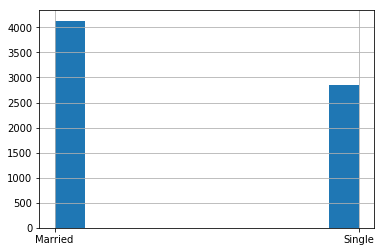

In [1618]:
df['Marital Status'].hist(bins=10)

In [1619]:
#We see that the count of 'Married' people is higher in the 'Marital Status' column

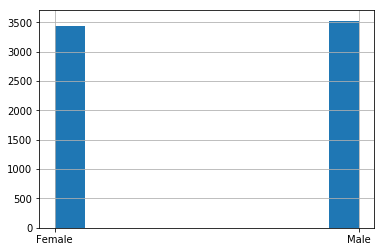

In [1620]:
df['Gender'].hist(bins=10)

In [1621]:
#We see that the count of 'Male' people is higher in the 'Gender' column

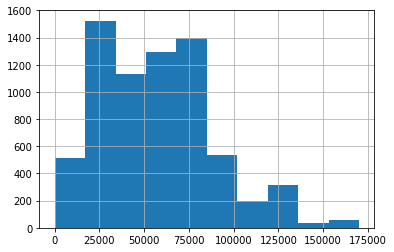

In [1622]:
df['Yearly Income'].hist(bins=10)

In [1623]:
#We see that there are around 1500 people with 'Yearly Income' of 25000 which is the highest number of people

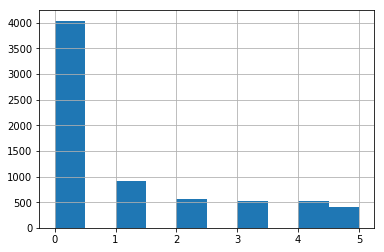

In [1624]:
df['Children'].hist(bins=10)

In [1625]:
#We see that there are around 4000 people with 0 children

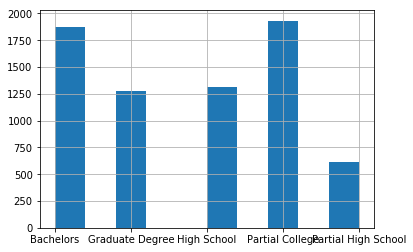

In [1626]:
df['Education'].hist(bins=10)

In [1627]:
#We see that maximum number of people are from partial college

C:\Anaconda3\lib\site-packages\IPython\core\displayhook.py:271: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


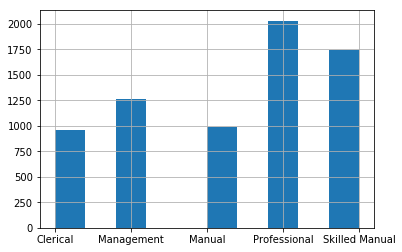

In [1628]:
df['Occupation'].hist(bins=10)

In [1629]:
#We see that maximum number of people are 'Professionals'

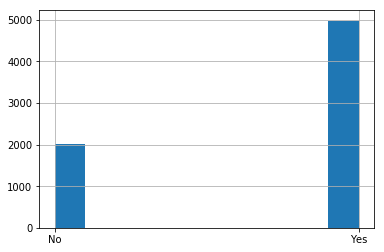

In [1630]:
df['Home Owner'].hist(bins=10)

In [1631]:
#We see that maximum number of people are home owners

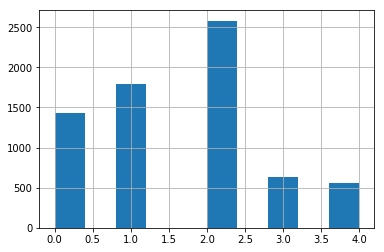

In [1632]:
df['Cars'].hist(bins=10)

In [1633]:
#We see that maximum number of people have 2 cars

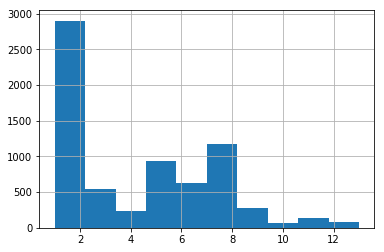

In [1634]:
df['Commute Distance'].hist(bins=10)

In [1635]:
#We see that maximum commute distance ranges from 1 to 2

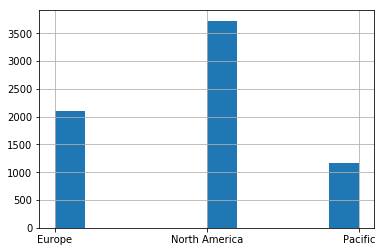

In [1636]:
df['Region'].hist(bins=10)

In [1637]:
#We see that maximum number of people are from North America

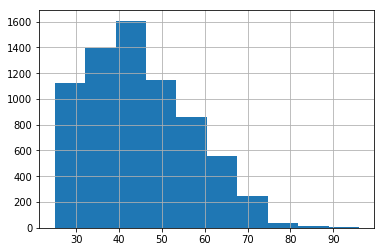

In [1638]:
df['Age'].hist(bins=10)

In [1639]:
#We see that there are maximum people having their ages ranging from 40 to 50

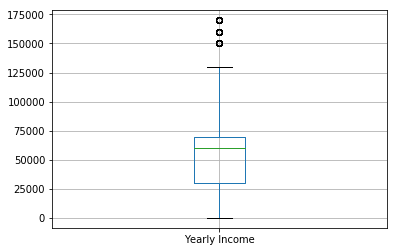

In [1640]:
df.boxplot('Yearly Income')

In [1641]:
#We see that there are three outliers in the 'Yearly Income' column and also the yearly income cannot be zero for the various set of occupations under 'Occupations' column

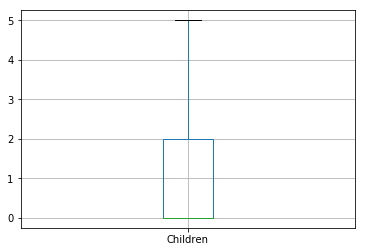

In [1642]:
df.boxplot('Children')

In [1643]:
#No outliers in the 'Children' column

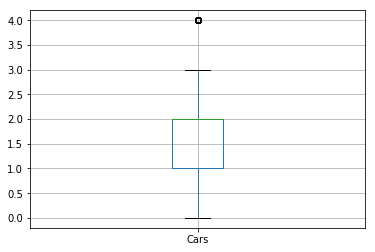

In [1644]:
df.boxplot('Cars')

In [1645]:
#We see that there is one outlier in the 'Cars' column

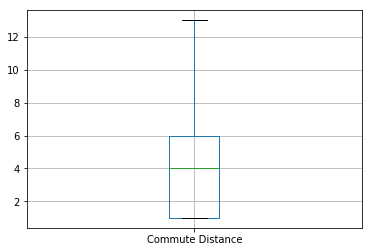

In [1646]:
df.boxplot('Commute Distance')

In [1647]:
#No outlier in the 'Commute Distance' column

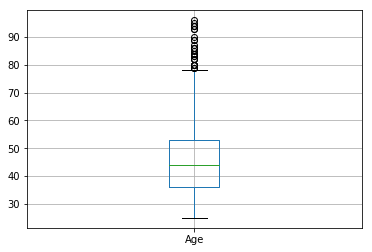

In [1648]:
df.boxplot('Age')

In [1649]:
#We see that there are a lot of outliers in the 'Age' column

In [1650]:
#Getting a count of missing values in the dataset
df.apply(lambda x: sum(x.isnull()), axis=0)

Marital Status      16
Gender              29
Yearly Income        0
Children            18
Education            0
Occupation           0
Home Owner           0
Cars                 0
Commute Distance    29
Region               0
Age                  0
Bike Buyer           0
dtype: int64

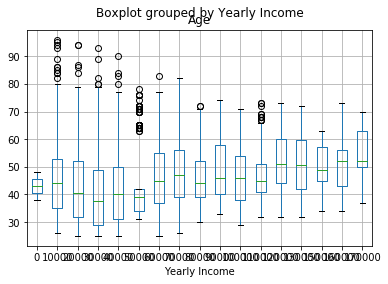

In [1651]:
df.boxplot(column='Age', by='Yearly Income') #boxplotting age against yearly income

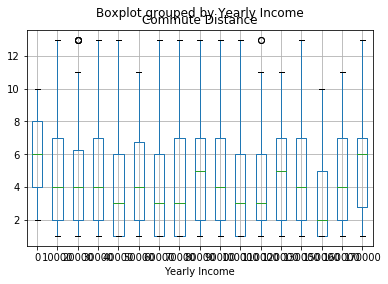

In [1652]:
df.boxplot(column='Commute Distance', by='Yearly Income') #boxplotting commute distance against yearly income

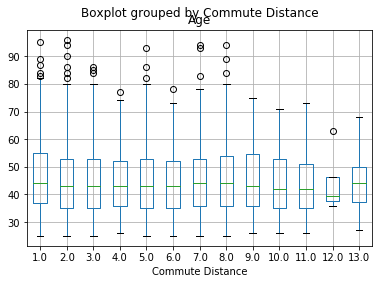

In [1653]:
df.boxplot(column='Age', by='Commute Distance') #boxplotting age against commute distance

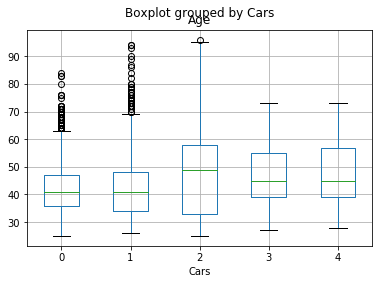

In [1654]:
df.boxplot(column='Age', by='Cars') #b0xplotting age against cars

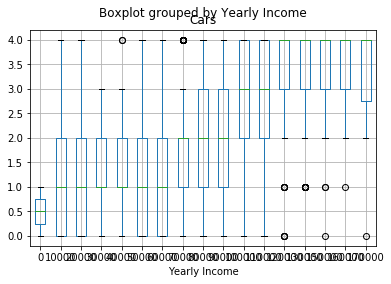

In [1655]:
df.boxplot(column='Cars', by='Yearly Income') #boxplotting cars against Yearly Income

# Treating Missing Values

In [1656]:
#Let's first fill the missing values in the 'Marital Status' column

In [1657]:
#As the number of married people is more in 'Marital Status' column, we fill all the values with 'Married'
df['Marital Status'].fillna('Married', inplace=True)
df

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
0,Single,Male,30000,0.0,Partial College,Clerical,No,1,1.0,Europe,33,Yes
1,Married,Female,40000,0.0,Graduate Degree,Clerical,Yes,0,1.0,Europe,37,Yes
2,Married,Male,160000,5.0,Partial College,Professional,No,3,2.0,Europe,55,No
3,Single,Male,160000,0.0,Graduate Degree,Management,Yes,2,5.0,Pacific,47,No
4,Married,Female,70000,2.0,Bachelors,Skilled Manual,No,1,1.0,North America,38,Yes
5,Married,NaN,120000,2.0,Bachelors,Management,Yes,3,1.0,North America,40,No
6,Single,Female,70000,0.0,High School,Professional,Yes,2,NaN,Pacific,49,Yes
7,Single,Female,60000,0.0,High School,Professional,No,2,1.0,North America,49,No
8,Married,Female,0,NaN,Bachelors,Clerical,Yes,0,10.0,Europe,38,Yes
9,Single,Female,20000,1.0,Partial College,Manual,No,0,1.0,Europe,46,Yes


In [1658]:
#Filling the missing values in the 'Gender' column

In [1659]:
#As the number of male people is more in 'Gender' column, we fill all the values with 'Male'
df['Gender'].fillna('Male', inplace=True)

In [1660]:
#Filling the missing values in the 'Children' column

In [1661]:
df['Children'].fillna(int(df['Children'].mean()), inplace=True)

In [1662]:
#Filling the missing values in the 'Commute Distance' column

In [1663]:
df['Commute Distance'].fillna(df['Commute Distance'].mean(), inplace=True)

In [1664]:
#Getting a count of missing values in the dataset again, after treating all the missing values
df.apply(lambda x: sum(x.isnull()), axis=0)

Marital Status      0
Gender              0
Yearly Income       0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Bike Buyer          0
dtype: int64

In [1665]:
#We see that all missing values were successfully filled

# Treating the Outliers

In [1666]:
#Treating the outliers of the 'Yearly Income' column
df['Yearly Income'].value_counts()

60000     1291
40000      906
70000      852
30000      834
20000      690
80000      548
10000      509
90000      296
100000     239
50000      226
110000     197
130000     186
120000     127
150000      37
160000      29
170000      28
0            2
Name: Yearly Income, dtype: int64

In [1667]:
#We see from the histogram and also from the above results that all the values of '150000', '160000', '170000', and '0' are outliers and have to be replaced with the mean of the column

In [1668]:
#Replacing the outliers with the mean
df['Yearly Income'].replace([0, 150000, 160000, 170000], [df['Yearly Income'].mean(), df['Yearly Income'].mean(), df['Yearly Income'].mean(), df['Yearly Income'].mean()], inplace=True)

In [1669]:
df['Yearly Income'].value_counts()

60000.000000     1291
40000.000000      906
70000.000000      852
30000.000000      834
20000.000000      690
80000.000000      548
10000.000000      509
90000.000000      296
100000.000000     239
50000.000000      226
110000.000000     197
130000.000000     186
120000.000000     127
57020.151493       96
Name: Yearly Income, dtype: int64

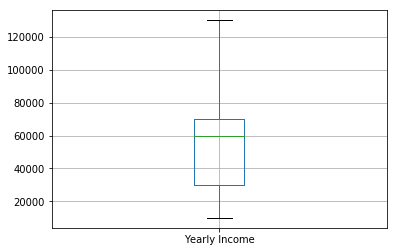

In [1670]:
df.boxplot('Yearly Income')

In [1671]:
#We see that all the outliers have been removed from the 'Yearly Income' column

In [1672]:
#Treating the outliers of the 'Cars' column
df['Cars'].value_counts()

2    2581
1    1788
0    1431
3     635
4     562
Name: Cars, dtype: int64

In [1673]:
#Replacing the outliers of the 'Cars' column
df['Cars'].replace([4], [int(df['Cars'].mean())], inplace=True)

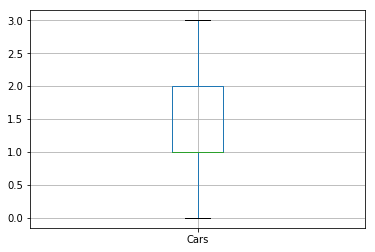

In [1674]:
df['Cars'].value_counts()
df.boxplot('Cars')

In [1675]:
#We see that all the outliers have been removed from the 'Cars' column

In [1676]:
#Treating the outliers of the 'Age' column
df['Age'].value_counts()

42    283
41    251
35    232
39    229
48    225
44    219
43    217
45    216
40    215
30    207
46    206
33    195
38    192
37    189
47    189
31    188
34    186
32    173
36    170
49    162
29    160
28    154
50    150
53    145
52    143
55    141
51    135
56    132
58    132
27    131
     ... 
64     87
65     61
68     56
69     55
66     52
67     41
70     36
71     35
72     31
73     24
25     13
74     10
75      8
77      8
76      6
78      5
80      5
84      4
94      3
86      3
82      3
79      2
83      2
93      2
89      2
85      1
96      1
90      1
87      1
95      1
Name: Age, Length: 68, dtype: int64

In [1677]:
#Replacing the outliers with the mean
df['Age'].replace([78, 80, 84, 94, 86, 82, 79, 83, 93, 89, 85, 96, 90, 87, 95], [int(df['Age'].mean()), int(df['Age'].mean()), int(df['Age'].mean()), int(df['Age'].mean()), int(df['Age'].mean()), int(df['Age'].mean()), int(df['Age'].mean()), int(df['Age'].mean()), int(df['Age'].mean()), int(df['Age'].mean()), int(df['Age'].mean()), int(df['Age'].mean()), int(df['Age'].mean()), int(df['Age'].mean()), int(df['Age'].mean())], inplace=True)

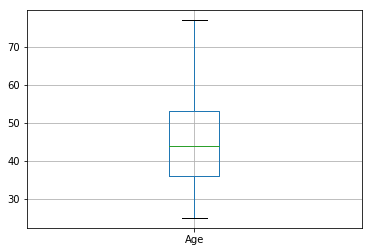

In [1678]:
df.boxplot('Age')

In [1679]:
#We see that all the outliers in the 'Age' column were successfully removed

In [1680]:
df

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
0,Single,Male,30000.000000,0.0,Partial College,Clerical,No,1,1.000000,Europe,33,Yes
1,Married,Female,40000.000000,0.0,Graduate Degree,Clerical,Yes,0,1.000000,Europe,37,Yes
2,Married,Male,57020.151493,5.0,Partial College,Professional,No,3,2.000000,Europe,55,No
3,Single,Male,57020.151493,0.0,Graduate Degree,Management,Yes,2,5.000000,Pacific,47,No
4,Married,Female,70000.000000,2.0,Bachelors,Skilled Manual,No,1,1.000000,North America,38,Yes
5,Married,Male,120000.000000,2.0,Bachelors,Management,Yes,3,1.000000,North America,40,No
6,Single,Female,70000.000000,0.0,High School,Professional,Yes,2,4.210103,Pacific,49,Yes
7,Single,Female,60000.000000,0.0,High School,Professional,No,2,1.000000,North America,49,No
8,Married,Female,57020.151493,1.0,Bachelors,Clerical,Yes,0,10.000000,Europe,38,Yes
9,Single,Female,20000.000000,1.0,Partial College,Manual,No,0,1.000000,Europe,46,Yes


# Encoding the categorical variables

In [1681]:
x = df.iloc[:,:-1].values
y = df.iloc[:,11].values

In [1682]:
#Encoding all the categorical features
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

#Label Encoding
labelencoder_x=LabelEncoder()
x[:,0]=labelencoder_x.fit_transform(x[:,0]) #index of Marital Status is 0
x[:,1]=labelencoder_x.fit_transform(x[:,1]) #index of Gender is 1
x[:,4]=labelencoder_x.fit_transform(x[:,4]) #index of Education is 4
x[:,5]=labelencoder_x.fit_transform(x[:,5]) #index of Occupation is 5
x[:,6]=labelencoder_x.fit_transform(x[:,6]) #index of Home owner is 6
x[:,9]=labelencoder_x.fit_transform(x[:,9]) #index of Region is 9

In [1683]:
#OneHot Encoding all the categorical variables which have more than two class values
ohe=OneHotEncoder(categorical_features=[4]) #index of Education is 4
x=ohe.fit_transform(x).toarray()
ohe=OneHotEncoder(categorical_features=[5]) #index of Occupation is 5
x=ohe.fit_transform(x).toarray()
ohe=OneHotEncoder(categorical_features=[9]) #index of Region is 9
x=ohe.fit_transform(x).toarray()

In [1684]:
x[2,:]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 5.70201515e+04, 3.00000000e+00,
       0.00000000e+00, 3.00000000e+00, 2.00000000e+00, 0.00000000e+00,
       5.50000000e+01])

# Normalising the feature values

In [1685]:
#Apply normalization to rescale the features to a standard range of values,
from sklearn import preprocessing
minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(x).transform(x)

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.15384615],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.23076923],
       [0.        , 0.        , 0.        , ..., 0.08333333, 0.        ,
        0.57692308],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.53846154],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.55769231],
       [0.        , 0.        , 0.        , ..., 0.08333333, 0.        ,
        0.55769231]])

# Classifications

# 1. kNN Classification

In [1686]:
#Splitting the dataset into training and test data set
from sklearn import cross_validation,neighbors
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [1687]:
#Fitting classifier to the training set
clf = neighbors.KNeighborsClassifier()
clf.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [1688]:
#Predicting the values
y_test_pred_kNN = clf.predict(x_test) #predicting the test values
y_test_pred_kNN

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [1689]:
y_test

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [1690]:
y_train_pred_kNN = clf.predict(x_train) #predicting the train values
y_train_pred_kNN

array(['No', 'No', 'No', ..., 'Yes', 'No', 'Yes'], dtype=object)

In [1691]:
#Accuracy of the model
kNN_test_accuracy = clf.score(x_test, y_test) #on test
print(kNN_test_accuracy * 100)

84.07142857142857


In [1692]:
kNN_train_accuracy = clf.score(x_train, y_train) #on train
print(kNN_train_accuracy * 100)

88.54743612649634


In [1693]:
#Build confusion matrix on test and train
from sklearn.metrics import confusion_matrix
kNN_cm_test = confusion_matrix(y_test, y_test_pred_kNN) #confusion matrix on test data
kNN_cm_test

array([[1145,   48],
       [ 175,   32]], dtype=int64)

In [1694]:
kNN_cm_train = confusion_matrix(y_train, y_train_pred_kNN) #confusion matrix on train data
kNN_cm_train

array([[4721,   83],
       [ 558,  235]], dtype=int64)

In [1695]:
#Precision score on test and train
from sklearn.metrics import precision_score
kNN_precision_test = precision_score(y_test, y_test_pred_kNN, average='weighted')
print(kNN_precision_test*100) #test data
kNN_precision_train = precision_score(y_train, y_train_pred_kNN, average='weighted')
print(kNN_precision_train*100) #train data

79.83122294372295
87.22941549716803


In [1696]:
#Recall score
from sklearn.metrics import recall_score
kNN_recall_test = recall_score(y_test, y_test_pred_kNN, average='weighted')
print(kNN_recall_test*100) #on test
kNN_recall_train = recall_score(y_train, y_train_pred_kNN, average='weighted')
print(kNN_recall_train*100) #on train

84.07142857142857
88.54743612649634


# 2. Logistic Regression

In [1697]:
#Splitting the dataset into training and test data set
#from sklearn.cross_validation import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [1698]:
#Performing Logistic Regression
from sklearn.linear_model.logistic import LogisticRegression
cls = LogisticRegression()
lr_cls = cls.fit(x_train, y_train)

In [1699]:
#Predicting the values
y_test_pred_lr = cls.predict(x_test) #predicting the test values
y_test_pred_lr

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [1700]:
y_test

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [1701]:
y_train_pred_lr = cls.predict(x_train) #predicting the train values
y_train_pred_lr

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [1702]:
#Accuracy of the model
lr_test_accuracy = cls.score(x_test, y_test) #on test
print(lr_test_accuracy * 100)

85.21428571428571


In [1703]:
lr_train_accuracy = cls.score(x_train, y_train) #on train
print(lr_train_accuracy * 100)

85.83169555118813


In [1704]:
#Build confusion matrix on test and train
from sklearn.metrics import confusion_matrix
lr_cm_test = confusion_matrix(y_test, y_test_pred_lr) #confusion matrix on test data
lr_cm_test

array([[1193,    0],
       [ 207,    0]], dtype=int64)

In [1705]:
lr_cm_train = confusion_matrix(y_train, y_train_pred_lr) #confusion matrix on train data
lr_cm_train

array([[4804,    0],
       [ 793,    0]], dtype=int64)

In [1706]:
#Precision score on test and train
from sklearn.metrics import precision_score
lr_precision_test = precision_score(y_test, y_test_pred_lr, average='weighted')
print(lr_precision_test*100) #test data
lr_precision_train = precision_score(y_train, y_train_pred_lr, average='weighted')
print(lr_precision_train*100) #train data

72.61474489795918
73.6707996119185


C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [1707]:
#Recall score
from sklearn.metrics import recall_score
lr_recall_test = recall_score(y_test, y_test_pred_lr, average='weighted')
print(lr_recall_test*100) #on test
lr_recall_train = recall_score(y_train, y_train_pred_lr, average='weighted')
print(lr_recall_train*100) #on train

85.21428571428571
85.83169555118813


# 3. Support Vector Machines

In [1708]:
#Support Vector Classification
from sklearn.svm import SVC
sc = SVC(kernel = 'rbf')
sc_classifier = sc.fit(x_train, y_train)   #model building

In [1709]:
#Predicting on Test and Train data
y_test_pred_svc = sc_classifier.predict(x_test) #on test
print(y_test_pred_svc)

['No' 'No' 'No' ... 'No' 'No' 'No']


In [1710]:
y_test

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [1711]:
y_train_pred_svc = sc_classifier.predict(x_train) #on train
print(y_train_pred_svc)

['No' 'No' 'No' ... 'Yes' 'No' 'No']


In [1712]:
#Accuracy of the model
svc_test_accuracy = sc_classifier.score(x_test, y_test) #on test
print(svc_test_accuracy * 100)

86.07142857142858


In [1713]:
svc_train_accuracy = sc_classifier.score(x_train, y_train) #on train
print(svc_train_accuracy * 100)

87.24316598177595


In [1714]:
#Build confusion matrix on test and train
from sklearn.metrics import confusion_matrix
svc_cm_test = confusion_matrix(y_test, y_test_pred_svc) #confusion matrix on test data
svc_cm_test

array([[1189,    4],
       [ 191,   16]], dtype=int64)

In [1715]:
svc_cm_train = confusion_matrix(y_train, y_train_pred_svc) #confusion matrix on train data
svc_cm_train

array([[4795,    9],
       [ 705,   88]], dtype=int64)

In [1716]:
#Precision score on test and train
from sklearn.metrics import precision_score
svc_precision_test = precision_score(y_test, y_test_pred_svc, average='weighted')
print(svc_precision_test*100) #test data
svc_precision_train = precision_score(y_train, y_train_pred_svc, average='weighted')
print(svc_precision_train*100) #train data

85.24870600414079
87.6833522577616


In [1717]:
#Recall score
from sklearn.metrics import recall_score
svc_recall_test = recall_score(y_test, y_test_pred_svc, average='weighted')
print(svc_recall_test*100) #on test
svc_recall_train = recall_score(y_train, y_train_pred_svc, average='weighted')
print(svc_recall_train*100) #on train

86.07142857142858
87.24316598177595


In [ ]:
y_pred_example_svc = np.array(['Single', 'Male', '55000', '1', 'Graduate Degree', 'Professional', 'Yes', ''])

# 4. Decision Tree

In [1718]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtc_clf = DecisionTreeClassifier()
dtc_clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [1719]:
#Predicting on test and train data
y_test_pred_dtc = dtc_clf.predict(x_test) #on test
y_test_pred_dtc

array(['Yes', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [1720]:
y_test

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [1721]:
y_train_pred_dtc = dtc_clf.predict(x_train) #on train
print(y_train_pred_dtc)

['No' 'No' 'No' ... 'Yes' 'No' 'No']


In [1722]:
#Accuracy of the model
dtc_test_accuracy = dtc_clf.score(x_test, y_test) #on test
print(dtc_test_accuracy * 100)

82.57142857142857


In [1723]:
dtc_train_accuracy = dtc_clf.score(x_train, y_train) #on train
print(dtc_train_accuracy * 100)

98.21332856887618


In [1724]:
#Build confusion matrix on test and train
from sklearn.metrics import confusion_matrix
dtc_cm_test = confusion_matrix(y_test, y_test_pred_dtc) #confusion matrix on test data
dtc_cm_test

array([[1087,  106],
       [ 138,   69]], dtype=int64)

In [1725]:
dtc_cm_train = confusion_matrix(y_train, y_train_pred_dtc) #confusion matrix on train data
dtc_cm_train

array([[4799,    5],
       [  95,  698]], dtype=int64)

In [1726]:
#Precision score on test and train
from sklearn.metrics import precision_score
dtc_precision_test = precision_score(y_test, y_test_pred_dtc, average='weighted')
print(dtc_precision_test*100) #test data
dtc_precision_train = precision_score(y_train, y_train_pred_dtc, average='weighted')
print(dtc_precision_train*100) #train data

81.44443148688048
98.23310565285662


In [1727]:
#Recall score
from sklearn.metrics import recall_score
dtc_recall_test = recall_score(y_test, y_test_pred_dtc, average='weighted')
print(dtc_recall_test*100) #on test
dtc_recall_train = recall_score(y_train, y_train_pred_dtc, average='weighted')
print(dtc_recall_train*100) #on train

82.57142857142857
98.21332856887618


# 5. Multiple Linear Regression

In [1729]:
df

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
0,Single,Male,30000.000000,0.0,Partial College,Clerical,No,1,1.000000,Europe,33,Yes
1,Married,Female,40000.000000,0.0,Graduate Degree,Clerical,Yes,0,1.000000,Europe,37,Yes
2,Married,Male,57020.151493,5.0,Partial College,Professional,No,3,2.000000,Europe,55,No
3,Single,Male,57020.151493,0.0,Graduate Degree,Management,Yes,2,5.000000,Pacific,47,No
4,Married,Female,70000.000000,2.0,Bachelors,Skilled Manual,No,1,1.000000,North America,38,Yes
5,Married,Male,120000.000000,2.0,Bachelors,Management,Yes,3,1.000000,North America,40,No
6,Single,Female,70000.000000,0.0,High School,Professional,Yes,2,4.210103,Pacific,49,Yes
7,Single,Female,60000.000000,0.0,High School,Professional,No,2,1.000000,North America,49,No
8,Married,Female,57020.151493,1.0,Bachelors,Clerical,Yes,0,10.000000,Europe,38,Yes
9,Single,Female,20000.000000,1.0,Partial College,Manual,No,0,1.000000,Europe,46,Yes


In [1730]:
#a = df1.iloc[:,[0,1,3,4,5,6,7,8,9,10,11]].values
#b = df1.iloc[:,11].values
a = df.iloc[:,[0,1,3,4,5,6,7,8,9,10,11]].values
b = df.iloc[:,2].values

In [1731]:
a

array([['Single', 'Male', 0.0, ..., 'Europe', 33, 'Yes'],
       ['Married', 'Female', 0.0, ..., 'Europe', 37, 'Yes'],
       ['Married', 'Male', 5.0, ..., 'Europe', 55, 'No'],
       ...,
       ['Married', 'Female', 5.0, ..., 'Europe', 53, 'No'],
       ['Single', 'Female', 5.0, ..., 'Europe', 54, 'No'],
       ['Married', 'Male', 5.0, ..., 'Europe', 54, 'No']], dtype=object)

In [1732]:
b

array([ 30000.       ,  40000.       ,  57020.1514935, ...,
        57020.1514935, 120000.       , 130000.       ])

In [1733]:
#Encoding all the categorical variables
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

#Label Encoding
labelencoder_a=LabelEncoder()
a[:,0]=labelencoder_a.fit_transform(a[:,0]) #index of Marital Status is 0
a[:,1]=labelencoder_a.fit_transform(a[:,1]) #index of Gender is 1
a[:,3]=labelencoder_a.fit_transform(a[:,3]) #index of Education is 3
a[:,4]=labelencoder_a.fit_transform(a[:,4]) #index of Occupation is 4
a[:,5]=labelencoder_a.fit_transform(a[:,5]) #index of Home owner is 5
a[:,8]=labelencoder_a.fit_transform(a[:,8]) #index of Region is 8
a[:,10]=labelencoder_a.fit_transform(a[:,10]) #index of Bike Buyer is 10

In [1734]:
#OneHot Encoding all the categorical variables which have more than two class values
ohe=OneHotEncoder(categorical_features=[3]) #index of Education is 3
a=ohe.fit_transform(a).toarray()
ohe=OneHotEncoder(categorical_features=[4]) #index of Occupation is 4
a=ohe.fit_transform(a).toarray()
ohe=OneHotEncoder(categorical_features=[8]) #index of Region is 8
a=ohe.fit_transform(a).toarray()

In [1735]:
a

array([[ 1.,  0.,  0., ...,  0., 33.,  1.],
       [ 1.,  0.,  0., ...,  0., 37.,  1.],
       [ 0.,  0.,  0., ...,  0., 55.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0., 53.,  0.],
       [ 0.,  0.,  0., ...,  0., 54.,  0.],
       [ 0.,  0.,  0., ...,  0., 54.,  0.]])

In [1736]:
b

array([ 30000.       ,  40000.       ,  57020.1514935, ...,
        57020.1514935, 120000.       , 130000.       ])

In [1737]:
#Normalising all the features to be in the same scale
#Apply normalization to rescale the features to a standard range of values,
from sklearn import preprocessing
minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(a).transform(a)

array([[1.        , 0.        , 0.        , ..., 0.        , 0.15384615,
        1.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.23076923,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.57692308,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.53846154,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.55769231,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.55769231,
        0.        ]])

In [1738]:
#Splitting the dataset into Training set and Test set
from sklearn.cross_validation import train_test_split
a_train, a_test, b_train, b_test = train_test_split(a,b,test_size=0.2)

In [1739]:
a_train

array([[ 1.,  0.,  0., ...,  1., 64.,  0.],
       [ 1.,  0.,  0., ...,  1., 32.,  0.],
       [ 0.,  0.,  0., ...,  2., 42.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  2., 42.,  0.],
       [ 1.,  0.,  0., ...,  0., 30.,  0.],
       [ 0.,  0.,  1., ...,  1., 55.,  0.]])

In [1740]:
a_test

array([[ 1.,  0.,  0., ...,  2., 26.,  1.],
       [ 1.,  0.,  0., ...,  0., 32.,  0.],
       [ 0.,  0.,  1., ...,  1., 56.,  0.],
       ...,
       [ 0.,  1.,  0., ...,  0., 61.,  1.],
       [ 0.,  0.,  0., ...,  0., 53.,  0.],
       [ 1.,  0.,  0., ...,  1., 69.,  0.]])

In [1741]:
b_train

array([90000., 30000., 60000., ..., 60000., 30000., 70000.])

In [1742]:
b_test

array([ 10000.,  30000.,  70000., ...,  70000., 100000.,  60000.])

In [1749]:
import statsmodels.formula.api as sm
a=np.append(arr=np.ones((6997,1)).astype(int), values=a, axis=1)

In [1750]:
a

array([[ 1.,  1.,  0., ...,  0., 33.,  1.],
       [ 1.,  1.,  0., ...,  0., 37.,  1.],
       [ 1.,  0.,  0., ...,  0., 55.,  0.],
       ...,
       [ 1.,  0.,  0., ...,  0., 53.,  0.],
       [ 1.,  0.,  0., ...,  0., 54.,  0.],
       [ 1.,  0.,  0., ...,  0., 54.,  0.]])

In [1754]:
reg_OLS = sm.OLS(endog = b, exog = a).fit()

In [1755]:
reg_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     268.2
Date:                Wed, 30 May 2018   Prob (F-statistic):               0.00
Time:                        11:30:53   Log-Likelihood:                -80163.
No. Observations:                6997   AIC:                         1.604e+05
Df Residuals:                    6978   BIC:                         1.605e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.255e+04    999.017     12.565      0.000    1.06e+04    1.45e+04
x1         -1.779e+04    488.704    -36.405      0.000   -1.87e+04   -1.68e+04
x2         -1.009e+04    763.455    -13.222      0.000   -1.16e+04   -8598.171
x3         -1444.3376    909.602     -1.588      0.112   -3227.434     338.759
x4          9176.1933    917.696      9.999      0.000    7377.230     1.1e+04
x5          1.322e+04    950.543     13.904      0.000    1.14e+04    1.51e+04
x6          1.949e+04   1051.187     18.541      0.000    1.74e+04    2.16e+04
x7          1.297e+04    571.112     22.719      0.000    1.19e+04    1.41e+04
x8          -422.3022    789.231     -0.535      0.593   -1969.434    1124.830
x9          7927.9865    510.710     15.523      0.000    6926.840    8929.133
x10         1.517e+04    628.466     24.138      0.000    1.39e+04    1.64e+04
x11         -1.06e+04    599.796    -17.675      0.000   -1.18e+04   -9425.451
x12          478.2456    485.803      0.984      0.325    -474.077    1430.568
x13         -976.7573    613.820     -1.591      0.112   -2180.032     226.517
x14         -578.1107    549.614     -1.052      0.293   -1655.522     499.301
x15         2801.1409    215.163     13.019      0.000    2379.357    3222.925
x16        -2119.0203    649.129     -3.264      0.001   -3391.511    -846.530
x17         4091.7602    367.752     11.126      0.000    3370.855    4812.665
x18           71.7971     93.916      0.764      0.445    -112.307     255.902
x19         7629.7090    461.453     16.534      0.000    6725.121    8534.297
x20          444.4878     26.823     16.571      0.000     391.907     497.068
x21         3354.7166    793.539      4.228      0.000    1799.139    4910.294
==============================================================================
Omnibus:                      217.451   Durbin-Watson:                   1.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.875
Skew:                           0.451   Prob(JB):                     2.22e-52
Kurtosis:                       2.977   Cond. No.                     3.35e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.36e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [1753]:
#We see that the x3, x8, x12, x13,, x14,, x18 columns have a P value greater than 0.05, so all these columns do not effect the 
#value of the target and can be neglected